In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("G:\\google drive data\\Machine learning Datasets\\Lesson 7\\AirPassengers.csv")

In [4]:
data.shape

(144, 2)

In [5]:
# 12 years and 12 month = 144
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#time series lib
from statsmodels.tsa.stattools import adfuller

In [11]:
data.set_index('Month', inplace=True)

In [12]:
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [13]:
ts=data['#Passengers']

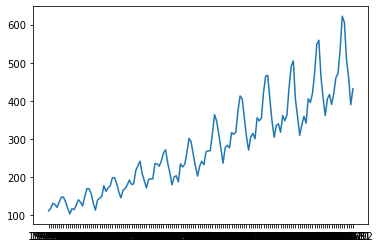

In [14]:
plt.plot(ts)

## Trend component in the series, We need to  check for stationarity of the data

In [15]:
def test_stationary(timeseries):
    
    # determine rolling stat.
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    # plot rolling stat
    plt.plot(timeseries,color='blue', label='original')
    plt.plot(movingAverage,color='red', label='Rollingmean')
    plt.plot(movingSTD,color='black', label='RollingSTD')
    plt.legend(loc='best')
    plt.title('stationarity Check')    
    plt.show()
    
    # Perfom Dicky fuller test
    print('Results')
    data=adfuller(timeseries['#Passengers'])
    dfoutput=pd.Series(data[0:4],index=['Test Stat','p-value','#Lags Used','Number of Observations used'])
    for key,value in data[4].items():
        dfoutput['Critical Values(%s)'%key]=value
    print(dfoutput)
    

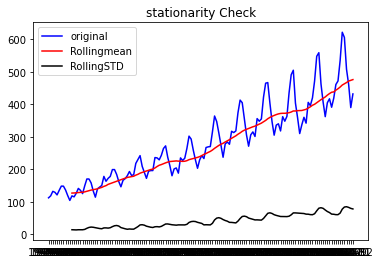

Results
Test Stat                        0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Values(1%)             -3.481682
Critical Values(5%)             -2.884042
Critical Values(10%)            -2.578770
dtype: float64


In [16]:
test_stationary(data)

In [17]:
# Rolling mean is increasing with time, and rolling std is fairly constant 
# data is not stationary - mean and std need to constant with time

# H0-data is non stationary 
# Stat value < Critical value _ _ _ _ Reject the null hypothesis

#  Accept H0 - data is non-stationary 

In [18]:
# Apply Log transformation
airpass_log=np.log(data)

In [19]:
airpass_log

,#Passengers
Month,
1949-01,4.718499
1949-02,4.770685
1949-03,4.882802
1949-04,4.859812
1949-05,4.795791
...,...
1960-08,6.406880
1960-09,6.230481
1960-10,6.133398


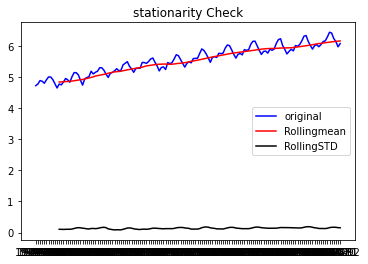

Results
Test Stat                       -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Values(1%)             -3.481682
Critical Values(5%)             -2.884042
Critical Values(10%)            -2.578770
dtype: float64


In [20]:
test_stationary(airpass_log)

In [21]:
# Calculate Log Moving Average
log_movingAverage=airpass_log.rolling(window=12).mean()
log_movingSTD=airpass_log.rolling(window=12).std()

In [22]:
airpass_new=airpass_log-log_movingAverage

In [23]:
airpass_new.head(25)

,#Passengers
Month,
1949-01,NaN
1949-02,NaN
1949-03,NaN
1949-04,NaN
1949-05,NaN
1949-06,NaN
1949-07,NaN
1949-08,NaN
1949-09,NaN


In [24]:
airpass_new.dropna(inplace=True)

In [25]:
airpass_new

,#Passengers
Month,
1949-12,-0.065494
1950-01,-0.093449
1950-02,-0.007566
1950-03,0.099416
1950-04,0.052142
...,...
1960-08,0.282363
1960-09,0.098235
1960-10,-0.009230


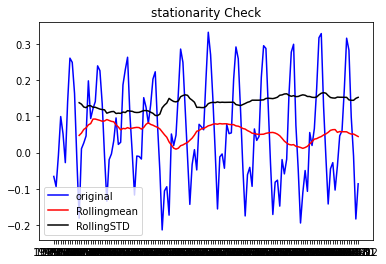

Results
Test Stat                       -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations used    119.000000
Critical Values(1%)             -3.486535
Critical Values(5%)             -2.886151
Critical Values(10%)            -2.579896
dtype: float64


In [26]:
test_stationary(airpass_new)

In [27]:
# To become stationary Data
# 1) Log Transformation - scaled down
# 2) difference with moving average

# Time Shift Transformation 

In [28]:
airpass_timeshift=airpass_log-airpass_log.shift()

In [29]:
airpass_timeshift

,#Passengers
Month,
1949-01,NaN
1949-02,0.052186
1949-03,0.112117
1949-04,-0.022990
1949-05,-0.064022
...,...
1960-08,-0.026060
1960-09,-0.176399
1960-10,-0.097083


In [30]:
airpass_timeshift.dropna(inplace=True)

In [31]:
airpass_timeshift

,#Passengers
Month,
1949-02,0.052186
1949-03,0.112117
1949-04,-0.022990
1949-05,-0.064022
1949-06,0.109484
...,...
1960-08,-0.026060
1960-09,-0.176399
1960-10,-0.097083


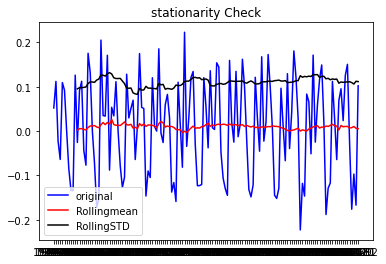

Results
Test Stat                       -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations used    128.000000
Critical Values(1%)             -3.482501
Critical Values(5%)             -2.884398
Critical Values(10%)            -2.578960
dtype: float64


In [32]:
test_stationary(airpass_timeshift)

In [33]:
# p value is 0.07 is not good as 0.02 of moving average 

In [34]:
## Time Series forcasting
# AR MODEL - Auto Regressive model 
# MA MODEL - Moving Average model
# ARMA MODEL - Auto Regressive Moving Average model
# ARIMA MODEL - Auto Regressive Integrated Moving Average model

In [35]:
# Import Libraray
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

In [36]:
lag_acf = acf(airpass_timeshift,nlags=20)
lag_pacf = pacf(airpass_timeshift,nlags=20,method='ols')

C:\Users\sw\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


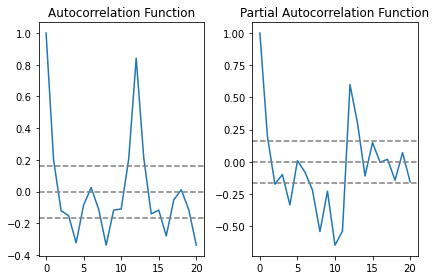

In [37]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(airpass_timeshift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(airpass_timeshift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(airpass_timeshift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(airpass_timeshift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()



In [38]:
# -1 to +1 
# t what leg value of X axis and y axis touches the '0' X-1 to 2 value of Q=2
# p Value numbre of AR=2

In [39]:
lag_acf

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439])

In [40]:
lag_pacf

array([ 1.        ,  0.20081508, -0.17368194, -0.09901213, -0.33527437,
        0.00872185, -0.07990745, -0.21923579, -0.5421352 , -0.22848913,
       -0.64775301, -0.53828661,  0.59971786,  0.29995642, -0.10992268,
        0.14878637, -0.00321881,  0.01892684, -0.14268478,  0.07089814,
       -0.15566902])

In [41]:
y=-1.96/np.sqrt(len(airpass_timeshift))

In [42]:
y

-0.1639034339613898

In [43]:
np.sqrt(len(airpass_timeshift))

11.958260743101398

In [44]:
import warnings
warnings.filterwarnings('ignore')

plotting AR Model


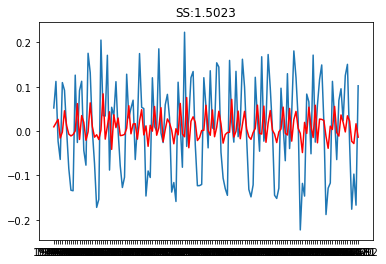

In [64]:
# Implement AR model
model1=ARIMA(airpass_log,order=(2,1,0))  # p=2, d=1(non-stationary), q=0(AR model)
results_AR=model1.fit()

# AR Model 
plt.plot(airpass_timeshift) 
plt.plot(results_AR.fittedvalues,color='red')
plt.title('SS:%.4f'%sum((results_AR.fittedvalues-airpass_timeshift['#Passengers'])**2))
print('plotting AR Model')

plotting MA Model


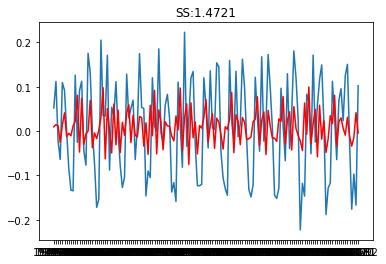

In [65]:
# Implement MA model
model2=ARIMA(airpass_log,order=(0,1,2))  # p=0, d=1(non-stationary), q=2(AR model)
results_MA=model2.fit()

# MA Model 
plt.plot(airpass_timeshift) 
plt.plot(results_MA.fittedvalues,color='red')
plt.title('SS:%.4f'%sum((results_MA.fittedvalues-airpass_timeshift['#Passengers'])**2))
print('plotting MA Model')

plotting ARIMA Model


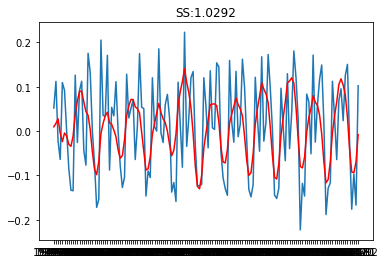

In [66]:
# Implement ARIMA model
model3=ARIMA(airpass_log,order=(2,1,2))  # p=2, d=1(non-stationary), q=2(AR model)
results_ARIMA=model3.fit()

# ARIMA Model 
plt.plot(airpass_timeshift) 
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('SS:%.4f'%sum((results_ARIMA.fittedvalues-airpass_timeshift['#Passengers'])**2))
print('plotting ARIMA Model')

plotting ARIMA2 Model


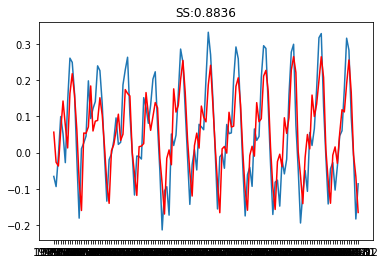

In [67]:
# Implement ARIMA 2 model
model4=ARIMA(airpass_new,order=(2,0,2))  # p=2, d=0(Stationary), q=2(AR model)
results_ARIMA2=model4.fit()
# ARIMA 2 Model 
plt.plot(airpass_new) 
plt.plot(results_ARIMA2.fittedvalues,color='red')
plt.title('SS:%.4f'%sum((results_ARIMA2.fittedvalues-airpass_new['#Passengers'])**2))
print('plotting ARIMA2 Model')

In [68]:
results_ARIMA.fittedvalues

Month
1949-02    0.009580
1949-03    0.017491
1949-04    0.027670
1949-05   -0.004521
1949-06   -0.023889
             ...   
1960-08   -0.041176
1960-09   -0.092350
1960-10   -0.094013
1960-11   -0.069924
1960-12   -0.008127
Length: 143, dtype: float64

In [69]:
airpass_log['#Passengers']

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Name: #Passengers, Length: 144, dtype: float64

# Predictions & Reverse Transformation

In [70]:
pred_ARIMA=pd.Series(results_ARIMA.fittedvalues,copy=True)
pred_ARIMA

Month
1949-02    0.009580
1949-03    0.017491
1949-04    0.027670
1949-05   -0.004521
1949-06   -0.023889
             ...   
1960-08   -0.041176
1960-09   -0.092350
1960-10   -0.094013
1960-11   -0.069924
1960-12   -0.008127
Length: 143, dtype: float64

In [71]:
pred_ARIMA_cumsum=pred_ARIMA.cumsum()
pred_ARIMA_cumsum

Month
1949-02    0.009580
1949-03    0.027071
1949-04    0.054742
1949-05    0.050221
1949-06    0.026331
             ...   
1960-08    1.372554
1960-09    1.280204
1960-10    1.186191
1960-11    1.116267
1960-12    1.108141
Length: 143, dtype: float64

In [72]:
pred_ARIMA_log=pd.Series(airpass_log['#Passengers'].iloc[0],index=airpass_log.index)
pred_ARIMA_log=pred_ARIMA_log.add(pred_ARIMA_cumsum,fill_value=0)
pred_ARIMA_log

Month
1949-01    4.718499
1949-02    4.728079
1949-03    4.745570
1949-04    4.773241
1949-05    4.768720
             ...   
1960-08    6.091053
1960-09    5.998703
1960-10    5.904690
1960-11    5.834766
1960-12    5.826639
Length: 144, dtype: float64

In [73]:
airpass_log

,#Passengers
Month,
1949-01,4.718499
1949-02,4.770685
1949-03,4.882802
1949-04,4.859812
1949-05,4.795791
...,...
1960-08,6.406880
1960-09,6.230481
1960-10,6.133398


In [74]:
# plot
pred_ARIMA=np.exp(pred_ARIMA_log)
pred_ARIMA

Month
1949-01    112.000000
1949-02    113.078122
1949-03    115.073414
1949-04    118.301986
1949-05    117.768364
              ...    
1960-08    441.886419
1960-09    402.905896
1960-10    366.753491
1960-11    341.984796
1960-12    339.216796
Length: 144, dtype: float64

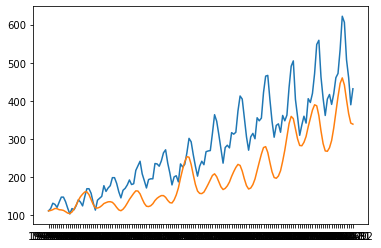

In [75]:
# plot between original data and log Data
plt.plot(data)
plt.plot(pred_ARIMA)

In [76]:
# We have 144, now suppose predict for additional 10 yrs (120 data points) 
# 144 + 120 = 264

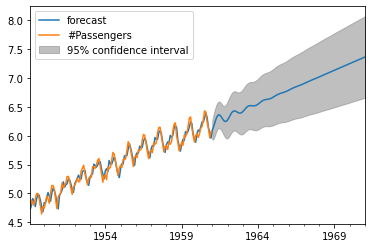

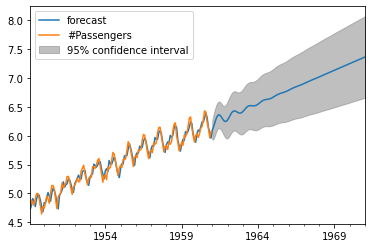

In [77]:
results_ARIMA.plot_predict(1,264)